In [1]:
import pandas as pd

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Oakland Weather.csv to Oakland Weather.csv


In [5]:
import io
weather = pd.read_csv(io.BytesIO(uploaded['Oakland Weather.csv']))
# Dataset is now stored in a Pandas Dataframe

In [17]:
import pandas as pd

weather = pd.read_csv("Oakland Weather.csv", index_col="DATE")

In [18]:
weather

,STATION,NAME,ACMH,ACSH,AWND,DAPR,FMTM,FRGT,MDPR,PGTM,...,WT01,WT02,WT03,WT04,WT05,WT07,WT08,WT09,WT16,WT18
DATE,,,,,,,,,,,,,,,,,,,,,
1960-01-01,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-02,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN
1960-01-03,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-04,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1960-01-05,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-18,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,18.12,NaN,NaN,NaN,NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2022-09-19,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.93,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-09-20,USW00023230,"OAKLAND INTERNATIONAL AIRPORT, CA US",NaN,NaN,6.49,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
weather.apply(pd.isnull).sum()/weather.shape[0]

STATION    0.000000
NAME       0.000000
ACMH       0.658186
ACSH       0.658186
AWND       0.515120
DAPR       0.999532
FMTM       0.871907
FRGT       0.999883
MDPR       0.999532
PGTM       0.502135
PRCP       0.016436
SNOW       0.334386
SNWD       0.327133
TAVG       0.880856
TMAX       0.000526
TMIN       0.000585
TSUN       0.932678
WDF1       0.658186
WDF2       0.515061
WDF5       0.520208
WDFG       0.750424
WSF1       0.658186
WSF2       0.515003
WSF5       0.520208
WSFG       0.750424
WT01       0.780546
WT02       0.980289
WT03       0.992981
WT04       0.999766
WT05       0.998362
WT07       0.999883
WT08       0.812072
WT09       0.999883
WT16       0.885652
WT18       0.999825
dtype: float64

In [20]:
core_weather = weather[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core_weather.columns = ["precip", "snow", "snow_depth", "temp_max", "temp_min"]

In [21]:
core_weather.apply(pd.isnull).sum()

precip         281
snow          5717
snow_depth    5593
temp_max         9
temp_min        10
dtype: int64

In [22]:
core_weather["snow"].value_counts()

0.0    11379
1.0        1
Name: snow, dtype: int64

In [23]:
core_weather["snow_depth"].value_counts()

0.0    11504
Name: snow_depth, dtype: int64

In [24]:
del core_weather["snow"]

In [25]:
del core_weather["snow_depth"]

In [26]:
core_weather[pd.isnull(core_weather["precip"])]

,precip,temp_max,temp_min
DATE,,,
1983-10-29,NaN,67.0,57.0
1983-10-30,NaN,70.0,63.0
1983-10-31,NaN,69.0,61.0
1983-11-12,NaN,63.0,55.0
1983-11-13,NaN,60.0,50.0
...,...,...,...
2013-12-15,NaN,58.0,33.0
2016-05-01,NaN,80.0,55.0
2016-05-02,NaN,68.0,53.0


In [27]:
core_weather.loc["2013-12-15",:]

precip       NaN
temp_max    58.0
temp_min    33.0
Name: 2013-12-15, dtype: float64

In [28]:
core_weather["precip"].value_counts() / core_weather.shape[0]

0.00    0.812014
0.01    0.025852
0.02    0.011698
0.03    0.007194
0.04    0.006083
          ...   
1.29    0.000058
1.73    0.000058
1.05    0.000058
1.38    0.000058
1.02    0.000058
Name: precip, Length: 176, dtype: float64

In [29]:
core_weather["precip"] = core_weather["precip"].fillna(0)

In [30]:
core_weather.apply(pd.isnull).sum()

precip       0
temp_max     9
temp_min    10
dtype: int64

In [31]:
core_weather[pd.isnull(core_weather["temp_min"])]

,precip,temp_max,temp_min
DATE,,,
2004-11-20,0.0,NaN,NaN
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2013-06-16,0.0,NaN,NaN
2020-08-29,0.0,NaN,NaN
2020-09-08,0.0,NaN,NaN


In [32]:
core_weather.loc["2011-12-18":"2011-12-28"]

,precip,temp_max,temp_min
DATE,,,
2011-12-18,0.0,52.0,33.0
2011-12-19,0.0,55.0,35.0
2011-12-20,0.0,61.0,35.0
2011-12-21,0.0,61.0,NaN
2011-12-22,0.0,62.0,NaN
2011-12-23,0.0,56.0,NaN
2011-12-24,0.0,55.0,NaN
2011-12-25,0.0,54.0,NaN
2011-12-26,0.0,50.0,32.0


In [33]:
core_weather = core_weather.fillna(method="ffill")

In [34]:
core_weather.apply(pd.isnull).sum()

precip      0
temp_max    0
temp_min    0
dtype: int64

In [35]:
# Check for missing value defined in data documentation
core_weather.apply(lambda x: (x == 9999).sum())

precip      0
temp_max    0
temp_min    0
dtype: int64

In [36]:
core_weather.dtypes

precip      float64
temp_max    float64
temp_min    float64
dtype: object

In [37]:
core_weather.index

Index(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04', '1960-01-05',
       '1960-01-06', '1960-01-07', '1960-01-08', '1960-01-09', '1960-01-10',
       ...
       '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16', '2022-09-17',
       '2022-09-18', '2022-09-19', '2022-09-20', '2022-09-21', '2022-09-22'],
      dtype='object', name='DATE', length=17097)

In [38]:
core_weather.index = pd.to_datetime(core_weather.index)

In [39]:
core_weather.index

DatetimeIndex(['1960-01-01', '1960-01-02', '1960-01-03', '1960-01-04',
               '1960-01-05', '1960-01-06', '1960-01-07', '1960-01-08',
               '1960-01-09', '1960-01-10',
               ...
               '2022-09-13', '2022-09-14', '2022-09-15', '2022-09-16',
               '2022-09-17', '2022-09-18', '2022-09-19', '2022-09-20',
               '2022-09-21', '2022-09-22'],
              dtype='datetime64[ns]', name='DATE', length=17097, freq=None)

In [40]:
core_weather.index.year

Int64Index([1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960, 1960,
            ...
            2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022, 2022],
           dtype='int64', name='DATE', length=17097)

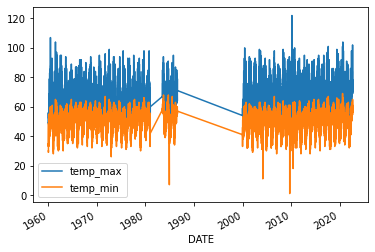

In [41]:
core_weather[["temp_max", "temp_min"]].plot()

In [42]:
core_weather.index.year.value_counts().sort_index()

1960    366
1961    365
1962    365
1963    365
1964    366
1965    365
1966    365
1967    365
1968    366
1969    365
1970    365
1971    365
1972    366
1973    365
1974    365
1975    365
1976    366
1977    365
1978    365
1979    365
1980    366
1983    184
1984    366
1985    365
1986    212
2000    365
2001    365
2002    365
2003    365
2004    366
2005    365
2006    365
2007    365
2008    366
2009    365
2010    365
2011    365
2012    365
2013    365
2014    365
2015    365
2016    366
2017    365
2018    365
2019    365
2020    366
2021    365
2022    265
Name: DATE, dtype: int64

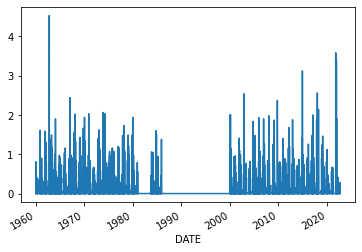

In [43]:
core_weather["precip"].plot()

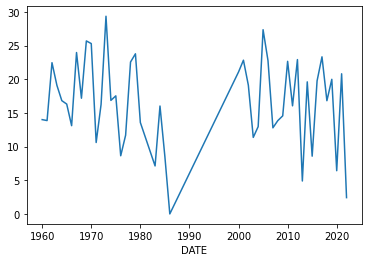

In [44]:
core_weather.groupby(core_weather.index.year).apply(lambda x: x["precip"].sum()).plot()

In [45]:
core_weather["target"] = core_weather.shift(-1)["temp_max"]

In [46]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2022-09-18,0.28,72.0,60.0,74.0
2022-09-19,0.00,74.0,56.0,74.0
2022-09-20,0.00,74.0,55.0,73.0


In [47]:
core_weather = core_weather.iloc[:-1,:].copy()

In [48]:
core_weather

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2022-09-17,0.00,70.0,58.0,72.0
2022-09-18,0.28,72.0,60.0,74.0
2022-09-19,0.00,74.0,56.0,74.0


In [49]:
from sklearn.linear_model import Ridge

reg = Ridge(alpha=.1)

In [50]:
predictors = ["precip", "temp_max", "temp_min"]

In [51]:
train = core_weather.loc[:"2020-12-31"]
test = core_weather.loc["2021-01-01":]

In [52]:
train

,precip,temp_max,temp_min,target
DATE,,,,
1960-01-01,0.00,49.0,30.0,49.0
1960-01-02,0.00,49.0,29.0,54.0
1960-01-03,0.00,54.0,35.0,54.0
1960-01-04,0.00,54.0,36.0,55.0
1960-01-05,0.00,55.0,33.0,53.0
...,...,...,...,...
2020-12-27,0.00,63.0,44.0,61.0
2020-12-28,0.10,61.0,42.0,60.0
2020-12-29,0.00,60.0,39.0,56.0


In [53]:
test

,precip,temp_max,temp_min,target
DATE,,,,
2021-01-01,0.00,60.0,40.0,57.0
2021-01-02,0.14,57.0,51.0,56.0
2021-01-03,0.00,56.0,49.0,62.0
2021-01-04,0.36,62.0,46.0,59.0
2021-01-05,0.00,59.0,42.0,59.0
...,...,...,...,...
2022-09-17,0.00,70.0,58.0,72.0
2022-09-18,0.28,72.0,60.0,74.0
2022-09-19,0.00,74.0,56.0,74.0


In [54]:
reg.fit(train[predictors], train["target"])

Ridge(alpha=0.1)

In [55]:
predictions = reg.predict(test[predictors])

In [60]:
from sklearn.metrics import mean_absolute_error

In [61]:
mean_absolute_error(test["target"], predictions)

3.4459754692264335

In [65]:
combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
combined.columns = ["actual", "predictions"]

In [66]:
combined

,actual,predictions
DATE,,
2021-01-01,57.0,59.806024
2021-01-02,56.0,59.310181
2021-01-03,62.0,58.538685
2021-01-04,59.0,61.531814
2021-01-05,59.0,59.444266
...,...,...
2022-09-17,72.0,70.251836
2022-09-18,74.0,71.435448
2022-09-19,74.0,72.777008


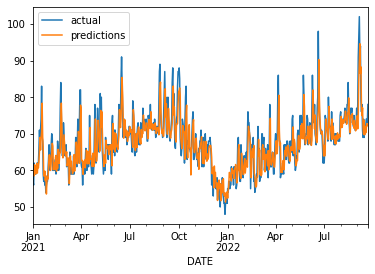

In [67]:
combined.plot()

In [68]:
reg.coef_

array([-2.20730384,  0.72113834,  0.17969047])

In [69]:
def create_predictions(predictors, core_weather, reg):
  train = core_weather.loc[:"2020-12-31"]
  test = core_weather.loc["2021-01-01":]
  reg.fit(train[predictors], train["target"])
  predictions = reg.predict(test[predictors])
  error = mean_absolute_error(test["target"], predictions)
  combined = pd.concat([test["target"], pd.Series(predictions, index=test.index)], axis=1)
  combined.columns = ["actual", "predictions"]
  return error, combined

In [70]:
core_weather["month_max"] = core_weather["temp_max"].rolling(30).mean()

In [71]:
core_weather

,precip,temp_max,temp_min,target,month_max
DATE,,,,,
1960-01-01,0.00,49.0,30.0,49.0,NaN
1960-01-02,0.00,49.0,29.0,54.0,NaN
1960-01-03,0.00,54.0,35.0,54.0,NaN
1960-01-04,0.00,54.0,36.0,55.0,NaN
1960-01-05,0.00,55.0,33.0,53.0,NaN
...,...,...,...,...,...
2022-09-17,0.00,70.0,58.0,72.0,77.300000
2022-09-18,0.28,72.0,60.0,74.0,77.366667
2022-09-19,0.00,74.0,56.0,74.0,77.300000


In [73]:
core_weather["month_day_max"] = core_weather["month_max"] / core_weather["temp_max"]

In [74]:
core_weather["max_min"] = core_weather["temp_max"] / core_weather["temp_min"]

In [75]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min"]

In [77]:
core_weather = core_weather.iloc[30:,:].copy()

In [78]:
error, combined = create_predictions(predictors, core_weather, reg)

In [79]:
error

3.3789604142417526

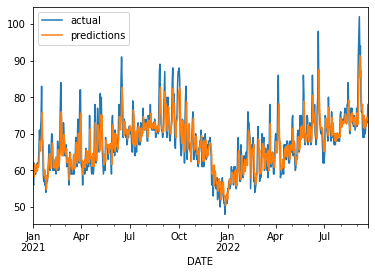

In [80]:
combined.plot()

In [81]:
core_weather["monthly_avg"] = core_weather["temp_max"].groupby(core_weather.index.month).apply(lambda x: x.expanding(1).mean())

In [82]:
core_weather

,precip,temp_max,temp_min,target,month_max,month_day_max,max_min,monthly_avg
DATE,,,,,,,,
1960-01-31,0.00,59.0,46.0,62.0,55.566667,0.941808,1.282609,59.000000
1960-02-01,0.81,62.0,51.0,59.0,56.000000,0.903226,1.215686,62.000000
1960-02-02,0.00,59.0,43.0,59.0,56.166667,0.951977,1.372093,60.500000
1960-02-03,0.20,59.0,47.0,60.0,56.333333,0.954802,1.255319,60.000000
1960-02-04,0.16,60.0,42.0,60.0,56.500000,0.941667,1.428571,60.000000
...,...,...,...,...,...,...,...,...
2022-09-17,0.00,70.0,58.0,72.0,77.300000,1.104286,1.206897,73.966356
2022-09-18,0.28,72.0,60.0,74.0,77.366667,1.074537,1.200000,73.964950
2022-09-19,0.00,74.0,56.0,74.0,77.300000,1.044595,1.321429,73.964975


In [83]:
core_weather["day_of_year_avg"] = core_weather["temp_max"].groupby(core_weather.index.day_of_year).apply(lambda x: x.expanding(1).mean())

In [84]:
predictors = ["precip", "temp_max", "temp_min", "month_max", "month_day_max", "max_min", "day_of_year_avg", "monthly_avg"]

In [85]:
error, combined = create_predictions(predictors, core_weather, reg)

In [86]:
error

3.339286424405073

In [87]:
reg.coef_

array([ -0.90804013,   0.40146278,   0.03114081,   0.33672074,
       -15.97061869,   0.0493612 ,   0.08006707,   0.14343362])

In [88]:
core_weather.corr()["target"]

precip            -0.205523
temp_max           0.821558
temp_min           0.595106
target             1.000000
month_max          0.686792
month_day_max     -0.422388
max_min            0.045383
monthly_avg        0.689776
day_of_year_avg    0.711989
Name: target, dtype: float64

In [89]:
combined["diff"] = (combined["actual"] - combined["predictions"]).abs()

In [90]:
combined.sort_values("diff", ascending=False).head()

,actual,predictions,diff
DATE,,,
2022-06-20,98.0,76.769311,21.230689
2022-05-23,86.0,69.834590,16.165410
2021-01-17,83.0,68.585837,14.414163
2022-09-03,91.0,76.695391,14.304609
2022-09-05,102.0,87.766461,14.233539
